<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/0503_Annotation_2KPair_matchingWordLength_poolingfrom11M_checkSources_SemanticSchilar_OnlyEconPapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from google.colab import drive
import csv
import os
import re
import pandas as pd
import numpy as np

directory = '/content/drive/MyDrive/finalMetaFile'
df = pd.read_csv(os.path.join(directory, 'combined_metadata_final12_features.csv'))
df=df[['sourcename', 'title']]
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-71-c69956b36397>:12: DtypeWarning: Columns (1,2,3,4,5,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(directory, 'combined_metadata_final12_features.csv'))


,sourcename,title
0,metadata_jstor_unifiedColName.csv,Economic Education in Our Schools: A Renewed M...
1,metadata_jstor_unifiedColName.csv,Can Germany Contain Russia Safely?
2,metadata_jstor_unifiedColName.csv,Assessing the Impact of Sarbanes-Oxley Act on ...
3,metadata_jstor_unifiedColName.csv,Childhood Educational Disruption and Later Lif...
4,metadata_jstor_unifiedColName.csv,The Exclusion of Liability for Negligence


# Get semantic scholar with Econ topics only

  22 minutes ago
Yeah if it's possible for you to check if there's a field in semantic scholar tagging econ/non econ papers then it would be great to know the proportion of econ and discard the other ones that we're not interested in

In [18]:
df_ss = pd.read_csv(os.path.join(directory, 'metadata_semantic_scholar.csv'))
df_ss.head()

<ipython-input-18-cfa3fbd62351>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ss = pd.read_csv(os.path.join(directory, 'metadata_semantic_scholar.csv'))


,paper_id,title,venue,year,reference_count,citation_count,publication_date,publication_types,authors,s2_fields_of_study,fields_of_study,journal_name,mag_id,corpus_id,pub_med_id,pub_med_central_id,arxiv_id,dblp_id,acl_id,doi
0,0000003ee9b8a4ef644842693ba78ce420cdc439,Agro-Industries for Economic Growth,"SEDME (Small Enterprises Development, Manageme...",1980.0,0,0,1980-06-01,JournalArticle,N. Joshi,Economics,NaN,"SEDME (Small Enterprises Development, Manageme...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1177/0970846419800204
1,000001d91985c527a5964dda397210f0eae2ecfd,Sequential Auctions with Supply or Demand Unce...,NaN,1997.0,0,12,NaN,NaN,R. B. Verde;J. Sákovics,Economics;Economics,Economics,NaN,2.793010e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000047b1466febc0389fc681456ee858e73d179,Comparative performance of IRDP schemes in gen...,NaN,1990.0,0,0,NaN,NaN,D. A. Deshmukh;S. Kalyankar;K. D. Rajmane,Economics;Economics,Economics,NaN,3.169189e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000005775773f34cd0e89135b3221ffd5a34eea2,Illiquidity in Intermediary Portfolios: Eviden...,NaN,2018.0,0,9,2018-01-05,NaN,D. Barth;Phillip J. Monin,Business;Economics,Business,Social Science Research Network,2.763354e+09,NaN,NaN,NaN,NaN,NaN,NaN,10.2139/SSRN.3044468
4,000005f7ebe1a860b19ed9b82fd42361be05b7fe,Moving Back Home: Insurance Against Labor Mark...,NaN,2008.0,60,0,NaN,NaN,Greg Kaplan,Economics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# venue, fields_of_study, s2_fields_of_study,publication_types

In [20]:
df_ss_light=df_ss[['title','venue', 'fields_of_study', 's2_fields_of_study', 'publication_types']]
#df_ss_light.to_csv(os.path.join(directory, 'metadata_semantic_scholar_light.csv'), index=False)

In [21]:
df_ss_light.head()

,title,venue,fields_of_study,s2_fields_of_study,publication_types
0,Agro-Industries for Economic Growth,"SEDME (Small Enterprises Development, Manageme...",NaN,Economics,JournalArticle
1,Sequential Auctions with Supply or Demand Unce...,NaN,Economics,Economics;Economics,NaN
2,Comparative performance of IRDP schemes in gen...,NaN,Economics,Economics;Economics,NaN
3,Illiquidity in Intermediary Portfolios: Eviden...,NaN,Business,Business;Economics,NaN
4,Moving Back Home: Insurance Against Labor Mark...,NaN,NaN,Economics,NaN


In [22]:
len(df_ss_light)

7912377

In [23]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

df_ss_light['title'] = df_ss_light['title'].str.lower()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-23-dd16a9c6b6ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss_light['title'] = df_ss_light['title'].str.lower()


In [24]:
def remove_non_english(df):
  def is_english(text):
    words = word_tokenize(text)
    english_word_count = sum(len(word) >= 2 for word in words)
    return english_word_count / len(words) >= 0.9

  df_filtered = df[df['title'].apply(is_english)]
  return df_filtered

df_ss_light['title'] = df_ss_light['title'].astype(str)

<ipython-input-24-b3527d05a0b2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss_light['title'] = df_ss_light['title'].astype(str)


In [25]:
df_ss_light = df_ss_light[~df_ss_light['title'].str.contains('و|д|я|š|ü|à|é|ś|ä|ú|의|θ|λ|ό|τ|η|τ|α|の|と', regex=True)]
df_ss_light.head()


,title,venue,fields_of_study,s2_fields_of_study,publication_types
0,agro-industries for economic growth,"SEDME (Small Enterprises Development, Manageme...",NaN,Economics,JournalArticle
1,sequential auctions with supply or demand unce...,NaN,Economics,Economics;Economics,NaN
2,comparative performance of irdp schemes in gen...,NaN,Economics,Economics;Economics,NaN
3,illiquidity in intermediary portfolios: eviden...,NaN,Business,Business;Economics,NaN
4,moving back home: insurance against labor mark...,NaN,NaN,Economics,NaN


In [26]:
len(df_ss_light)

7524145

In [27]:
# after remove special characters /all SS
(7524145/7912377)*100.00

95.09335816531492

In [28]:
df_ss_light = remove_non_english(df_ss_light.copy())
len(df_ss_light)

4601455

In [29]:
# nltk lib/after remove special characters and per all titles
len(df_ss_light)/7524145, len(df_ss_light)/7912377

(0.6115585225962551, 0.5815515362829653)

In [37]:
len(df_ss_light['venue'].value_counts())

84157

In [39]:

unique_venues = df_ss_light['venue'].value_counts()
high_count_venues = unique_venues[unique_venues > 100]
print(f"Unique venues with value_count > 100: {len(high_count_venues)}")
print(high_count_venues)


Unique venues with value_count > 100: 1284
venue
Social Science Research Network                     43716
CABI Compendium                                     19167
Sustainability                                      10253
Nature                                               6250
arXiv.org                                            4317
                                                    ...  
Journal of Agricultural Economics                     101
Geoforum                                              101
India Studies in Business and Economics               101
Jurnal Akuntansi                                      101
Mezhdunarodnaja jekonomika (The World Economics)      101
Name: count, Length: 1284, dtype: int64


In [38]:
df_ss_light['venue'].value_counts()

venue
Social Science Research Network                                                               43716
CABI Compendium                                                                               19167
Sustainability                                                                                10253
Nature                                                                                         6250
arXiv.org                                                                                      4317
                                                                                              ...  
EAI Endorsed Trans. Complex Syst.                                                                 1
Contestable Markets Theory, Competition, and the United States Commercial Banking Industry        1
Saudi Journal for Health Sciences                                                                 1
Finanzmärkte, Finanzinnovationen und Geldpolitik.                                             

In [32]:
df_ss_light['fields_of_study'].unique()

array([nan, 'Economics', 'Business', ...,
       'Computer Science;Geography;Physics;Business',
       'Geology;Environmental Science;Engineering',
       'Physics;Economics;Environmental Science;Mathematics'],
      dtype=object)

In [40]:
len(df_ss_light['fields_of_study'].unique())

2959

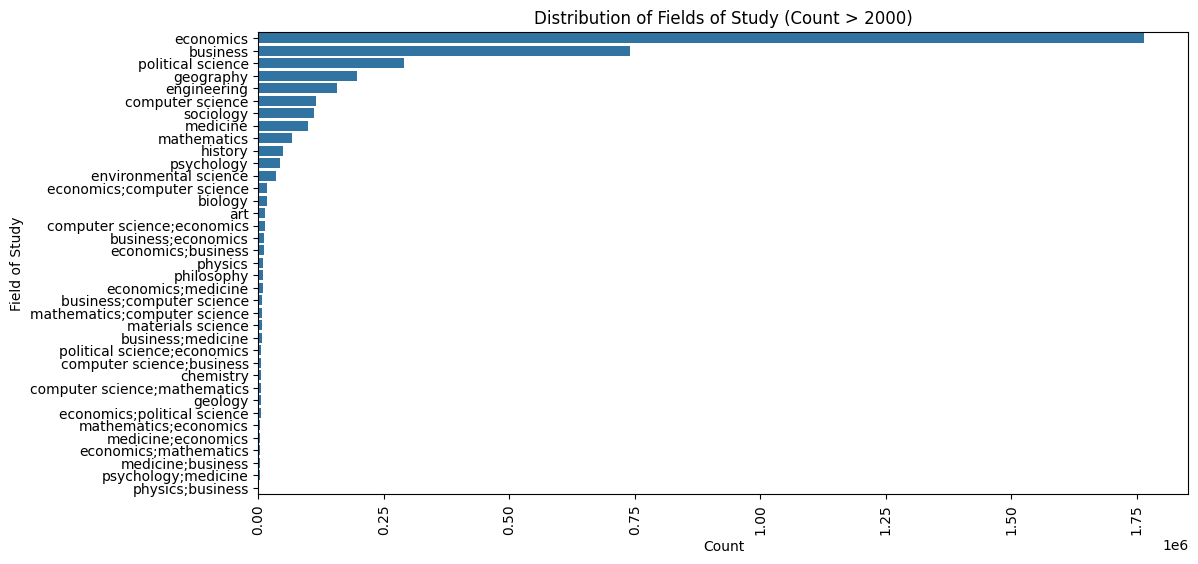

In [53]:
 df_ss_light['fields_of_study'] = df_ss_light['fields_of_study'].str.lower()

import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values of 'fields_of_study' with their counts
fields_of_study_counts = df_ss_light['fields_of_study'].value_counts()

# Filter the fields of study with count more than 100
fields_of_study_counts_filtered = fields_of_study_counts[fields_of_study_counts > 2000]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=fields_of_study_counts_filtered.values, y=fields_of_study_counts_filtered.index)

# Add title and labels
plt.title('Distribution of Fields of Study (Count > 2000)')
plt.xlabel('Count')
plt.ylabel('Field of Study')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


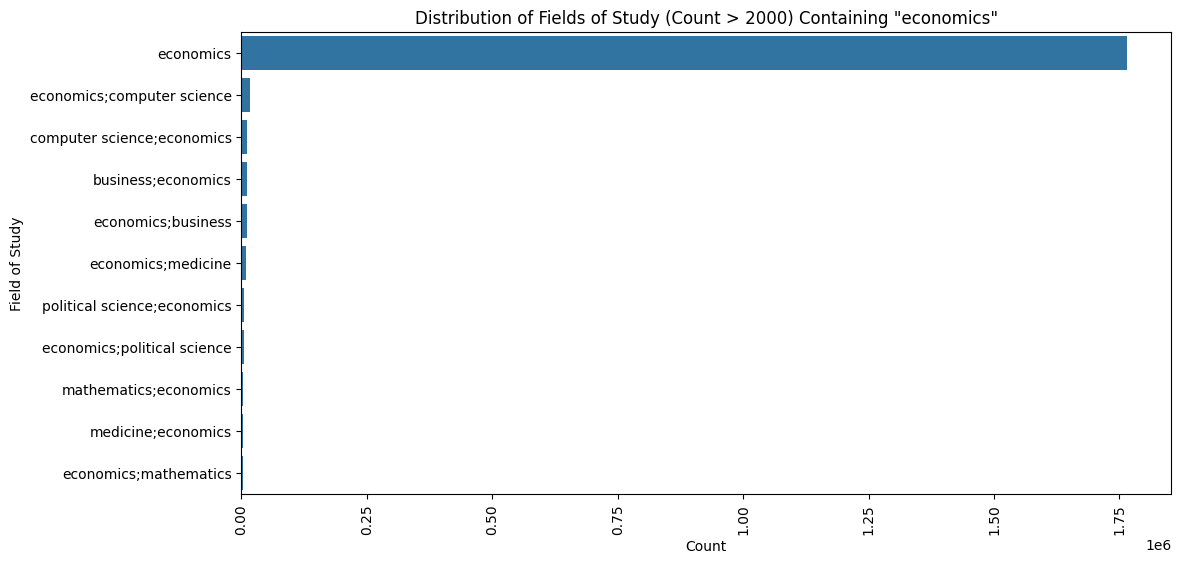

In [54]:

# Get the fields of study that contain 'economics'
economics_fields = fields_of_study_counts_filtered[fields_of_study_counts_filtered.index.str.contains('economics', case=True, regex=True)]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=economics_fields.values, y=economics_fields.index)

# Add title and labels
plt.title('Distribution of Fields of Study (Count > 2000) Containing "economics"')
plt.xlabel('Count')
plt.ylabel('Field of Study')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [64]:
df_ss_light['fields_of_study'] = df_ss_light['fields_of_study'].astype(str)

In [65]:
#df_ss_light['fields_of_study']
df_filter=df_ss_light[df_ss_light['fields_of_study'].str.contains('economics', case=True, regex=True)]
len(df_filter)

1879037

In [66]:
len(df_filter)/len(df_ss_light)

0.4083571392092284

In [67]:
df_filter.head()

,title,venue,fields_of_study,s2_fields_of_study,publication_types
1,sequential auctions with supply or demand unce...,NaN,economics,economics;economics,NaN
2,comparative performance of irdp schemes in gen...,NaN,economics,economics;economics,NaN
5,global value chains and changing trade elastic...,NaN,economics,economics;economics,Review
6,bhutan policy note,NaN,business;economics,business;economics;economics,Review
7,the constitutional protection of trade secrets...,Food and drug law journal,economics;medicine,economics;medicine;law,JournalArticle;Review


In [68]:
df_filter=df_filter[['title']]
df_filter.head()

,title
1,sequential auctions with supply or demand unce...
2,comparative performance of irdp schemes in gen...
5,global value chains and changing trade elastic...
6,bhutan policy note
7,the constitutional protection of trade secrets...


In [70]:
df_filter.to_csv(os.path.join(directory, 'semantic_scholar_fields_of_study_economics.csv'), index=False)

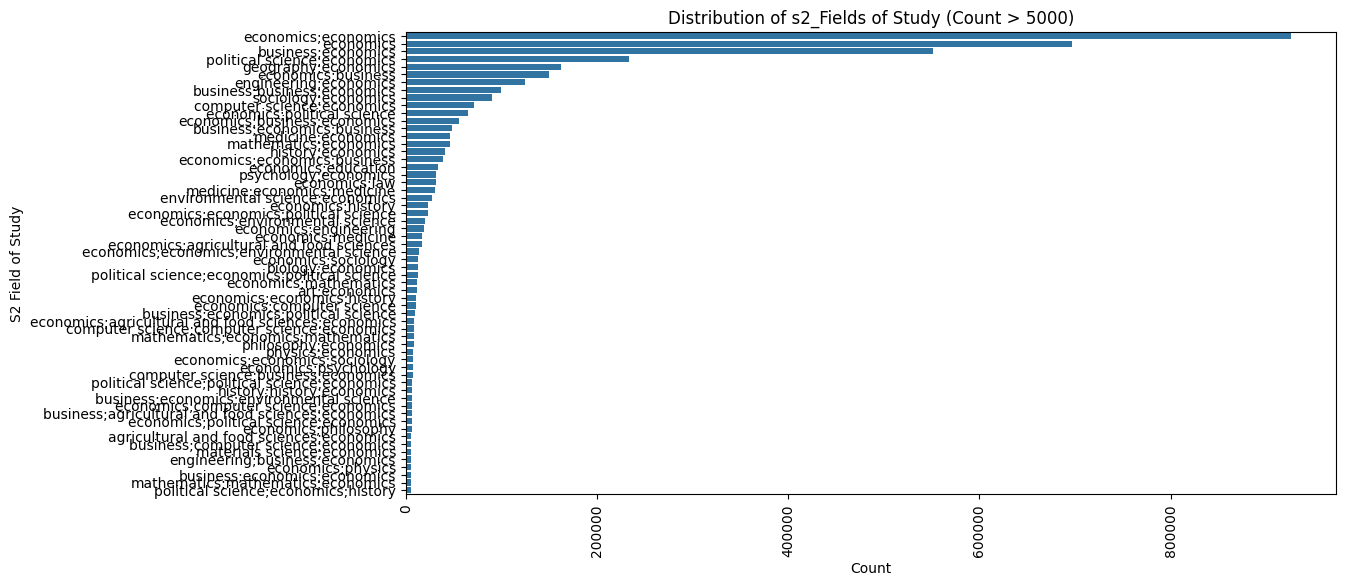

In [57]:
 #df_ss_light['s2_fields_of_study'] = df_ss_light['s2_fields_of_study'].str.lower()

import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values of 'fields_of_study' with their counts
fields_of_study_counts = df_ss_light['s2_fields_of_study'].value_counts()

# Filter the fields of study with count more than 100
fields_of_study_counts_filtered = fields_of_study_counts[fields_of_study_counts > 5000]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=fields_of_study_counts_filtered.values, y=fields_of_study_counts_filtered.index)

# Add title and labels
plt.title('Distribution of s2_Fields of Study (Count > 5000)')
plt.xlabel('Count')
plt.ylabel('S2 Field of Study')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

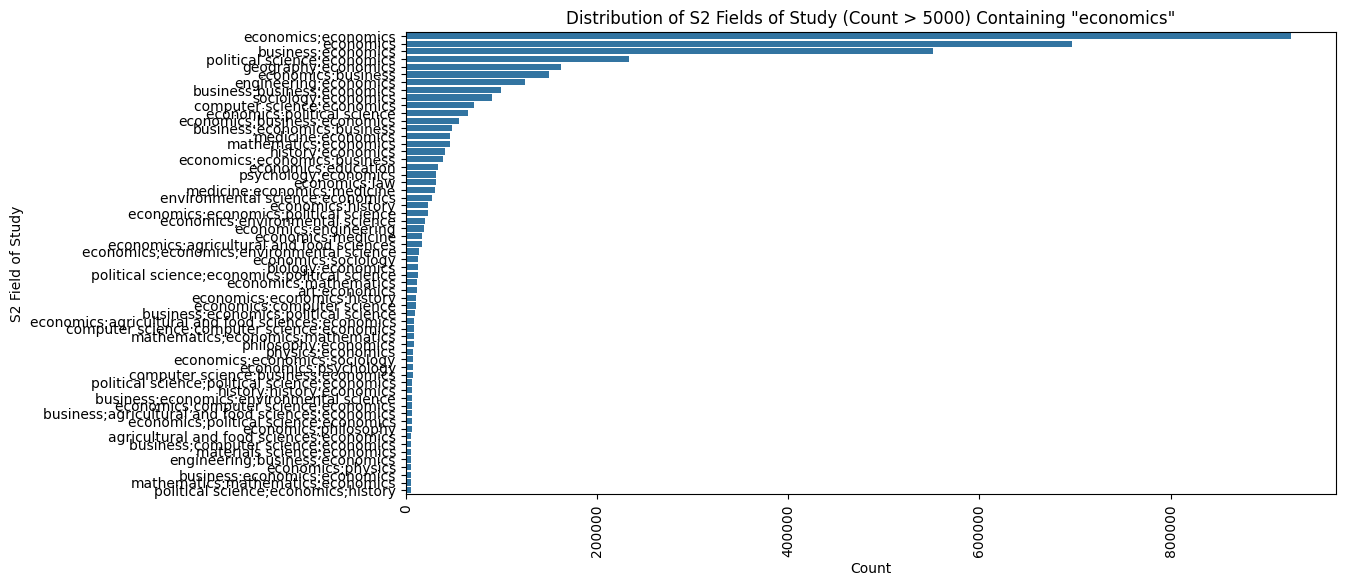

In [58]:
# Get the fields of study that contain 'economics'
economics_fields = fields_of_study_counts_filtered[fields_of_study_counts_filtered.index.str.contains('economics', case=True, regex=True)]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=economics_fields.values, y=economics_fields.index)

# Add title and labels
plt.title('Distribution of S2 Fields of Study (Count > 5000) Containing "economics"')
plt.xlabel('Count')
plt.ylabel('S2 Field of Study')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [34]:
pd.crosstab(df_ss_light['s2_fields_of_study'], df_ss_light['fields_of_study'])


fields_of_study,Art,Art;Biology,Art;Biology;Sociology,Art;Business,Art;Business;History,Art;Chemistry,Art;Computer Science,Art;Computer Science;Economics,Art;Economics,Art;Economics;Business,...,Sociology;Psychology;Economics;Business,Sociology;Psychology;Economics;Philosophy,Sociology;Psychology;Economics;Philosophy;Geography;Medicine;Art,Sociology;Psychology;Economics;Political Science;Business,Sociology;Psychology;Engineering,Sociology;Psychology;Geography;Philosophy;Economics,Sociology;Psychology;Medicine,Sociology;Psychology;Medicine;Economics;Biology;Computer Science,Sociology;Psychology;Philosophy;Engineering;Business;History;Economics;Art;Computer Science;Political Science,Sociology;Psychology;Political Science
s2_fields_of_study,,,,,,,,,,,,,,,,,,,,,
Art;Agricultural And Food Sciences;Economics,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art;Agricultural and Food Sciences;Business;Economics,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art;Agricultural and Food Sciences;Economics,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art;Agricultural and Food Sciences;Economics;Environmental Science,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art;Art;Business;Economics,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sociology;Sociology;Law;Economics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sociology;Sociology;Medicine;Economics;Psychology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sociology;Sociology;Medicine;Psychology;Economics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
pd.crosstab(df_ss_light['venue'], df_ss_light['fields_of_study'])


fields_of_study,Art,Art;Biology,Art;Computer Science,Art;Economics,Art;Economics;Business,Art;Economics;History,Art;Economics;Political Science,Art;Engineering,Art;Engineering;Political Science;Sociology,Art;Geography,...,Sociology;Physics;Computer Science;Economics,Sociology;Physics;Computer Science;Political Science,Sociology;Political Science,Sociology;Political Science;Computer Science,Sociology;Political Science;Economics,Sociology;Political Science;History,Sociology;Political Science;Medicine,Sociology;Psychology,Sociology;Psychology;Medicine,Sociology;Psychology;Medicine;Economics;Biology;Computer Science
venue,,,,,,,,,,,,,,,,,,,,,
"""EСONOMY. FINANСES. MANAGEMENT: Topical issues of science and practical activity""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""International Humanitarian University Herald. Jurisprudence""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Our Aim Was Man""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Public management and administration in Ukraine""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""REFORMASI: Jurnal Ilmiah Administrasi""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
법학논총,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
법학연구,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
사회적기업연구(Social Enterprise Studies),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
unique_sources = df['sourcename'].unique()
print(unique_sources)


['metadata_jstor_unifiedColName.csv'
 'scopus_fixed_encoding_unifiedColName.csv'
 'elsevier_metadata_unifiedColName.csv'
 'metadata_semantic_scholar_unifiedColName.csv'
 'url1_ie_table_complete_unifiedColName.csv'
 'metadata_econlit_unifiedColName.csv' 'SSRN_metadata_unifiedColName.csv'
 'metadata_repec_unifiedColName.csv']


In [73]:
df['sourcename'] = df['sourcename'].apply(lambda x: x.replace('metadata_', ''))
df['sourcename'] = df['sourcename'].apply(lambda x: x.replace('_unifiedColName.csv', ''))
df['sourcename'].replace(['url1_ie_table_complete', 'scopus_fixed_encoding','SSRN'], ['3ie', 'scopus','ssrn'], inplace=True)


In [74]:
unique_sources = df['sourcename'].unique()
print(unique_sources)

['jstor' 'scopus' 'elsevier' 'semantic_scholar' '3ie' 'econlit' 'ssrn'
 'repec']


In [75]:
# drop semantic scholar papers to append econ-only semantic scholar papers
df = df[df['sourcename'] != 'semantic_scholar']

In [76]:
df_filter['sourcename'] = 'semantic_scholar'

In [77]:
df_filter.head()

,title,sourcename
1,sequential auctions with supply or demand unce...,semantic_scholar
2,comparative performance of irdp schemes in gen...,semantic_scholar
5,global value chains and changing trade elastic...,semantic_scholar
6,bhutan policy note,semantic_scholar
7,the constitutional protection of trade secrets...,semantic_scholar


In [79]:
df_filter = df_filter[['sourcename', 'title']]
df_filter

,sourcename,title
1,semantic_scholar,sequential auctions with supply or demand unce...
2,semantic_scholar,comparative performance of irdp schemes in gen...
5,semantic_scholar,global value chains and changing trade elastic...
6,semantic_scholar,bhutan policy note
7,semantic_scholar,the constitutional protection of trade secrets...
...,...,...
7912359,semantic_scholar,copper demand forecasts and predictions of fut...
7912362,semantic_scholar,impact of urbanization on energy related co2 e...
7912365,semantic_scholar,environmental policy and directed technologica...
7912368,semantic_scholar,inflation and economic growth: evidence from t...


In [80]:
len(df_filter)

1879037

In [78]:
df.head()

,sourcename,title
0,jstor,Economic Education in Our Schools: A Renewed M...
1,jstor,Can Germany Contain Russia Safely?
2,jstor,Assessing the Impact of Sarbanes-Oxley Act on ...
3,jstor,Childhood Educational Disruption and Later Lif...
4,jstor,The Exclusion of Liability for Negligence


In [81]:
len(df)

3344673

In [82]:
len(df)+len(df_filter)

5223710

In [84]:
df_output = pd.concat([df, df_filter])
df_output.head()


,sourcename,title
0,jstor,Economic Education in Our Schools: A Renewed M...
1,jstor,Can Germany Contain Russia Safely?
2,jstor,Assessing the Impact of Sarbanes-Oxley Act on ...
3,jstor,Childhood Educational Disruption and Later Lif...
4,jstor,The Exclusion of Liability for Negligence


In [85]:
len(df_output)

5223710

In [86]:
df_output.to_csv(os.path.join(directory, 'combined_metadata_final12_econOnlySemanticScholar.csv'), index=False)

In [87]:
df=df_output

In [99]:
df_output.head()

,sourcename,title,word_count
0,jstor,Economic Education in Our Schools: A Renewed M...,8
1,jstor,Can Germany Contain Russia Safely?,5
2,jstor,Assessing the Impact of Sarbanes-Oxley Act on ...,10
3,jstor,Childhood Educational Disruption and Later Lif...,12
4,jstor,The Exclusion of Liability for Negligence,6


In [161]:
len(df_output)

5223710

# try simple. Sample 1M and oob 1M then drop if sourname_1==sourcename2. Then measure L1 between title1 and title2

In [162]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

df['title'] = df['title'].str.lower()

def remove_non_english(df):
  def is_english(text):
    words = word_tokenize(text)
    english_word_count = sum(len(word) >= 2 for word in words)
    return english_word_count / len(words) >= 0.9

  df_filtered = df[df['title'].apply(is_english)]
  return df_filtered

df['title'] = df['title'].astype(str)
df = df[~df['title'].str.contains('و|д|я|š|ü|à|é|ś|ä|ú|의|θ|λ|ό|τ|η|τ|α|の|と', regex=True)]
df = remove_non_english(df.copy())
def count_words(title):
  words = title.split()
  return len(words)

df['word_count'] = df['title'].apply(count_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [163]:
len(df)

3893006

In [ ]:
min=5
max=20

df = df[(df['word_count'] >= min) & (df['word_count'] <= max)]

title_sample_size= 1000000

def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size, random_state=321)
  else:
    return df


df_title1 = sample_dataframe(df, title_sample_size)
df_title1 = df_title1.rename(columns={"title": "title1","sourcename": "sourcename1","word_count": "word_count1"})


In [168]:
df_title2 = df[~df['title'].isin(df_title1['title1'])]


In [166]:
df_title1.head()

,sourcename1,title1,word_count1
7580196,semantic_scholar,measuring the impact of research,5
6111825,semantic_scholar,essays in international economics and development,6
1085719,semantic_scholar,response of industrial and commercial customer...,9
803264,jstor,"ballistic, cruise missile defense also on list...",17
2920321,semantic_scholar,an econometric analysis of the regulation powe...,13


In [170]:
df_title2 = df_title2.rename(columns={"title": "title2","sourcename": "sourcename2","word_count": "word_count2"})
df_title2.head()

,sourcename2,title2,word_count2
3,jstor,childhood educational disruption and later lif...,12
4,jstor,the exclusion of liability for negligence,6
6,jstor,preserving the new peace: the case against nat...,9
12,jstor,china's skilled labor on the move: how taiwan ...,14
18,jstor,optimal mechanisms with finite agent types,6


In [176]:
#df_title2_2 = sample_dataframe(df_title2, title_sample_size)
len(df_title2_2)
df_title2=df_title2_2

In [186]:
df_title1.to_csv(os.path.join(directory, 'df_title1.csv'), index=False)
df_title2.to_csv(os.path.join(directory, 'df_title2.csv'), index=False)

In [178]:
len(df_title1),len(df_title2)

(1000000, 1000000)

In [179]:

df_title1 = df_title1.reset_index(drop=True)
df_title2 = df_title2.reset_index(drop=True)


In [180]:
df_pair=pd.concat([df_title1, df_title2], axis=1)

In [181]:
df_pair.head()

,sourcename1,title1,word_count1,sourcename2,title2,word_count2
0,semantic_scholar,measuring the impact of research,5,semantic_scholar,strategic choice on improving self - competiti...,11
1,semantic_scholar,essays in international economics and development,6,scopus,the less developed states are converging to th...,19
2,semantic_scholar,response of industrial and commercial customer...,9,jstor,l'argent et la pratique bancaire,5
3,jstor,"ballistic, cruise missile defense also on list...",17,scopus,jaso atf subcommittee activities toward the ne...,9
4,semantic_scholar,an econometric analysis of the regulation powe...,13,semantic_scholar,uk alternative business structures for legal p...,14


In [182]:
len(df_pair)


1000000

In [184]:
df_pair = df_pair.drop(df_pair.loc[df_pair['sourcename1'] == df_pair['sourcename2']].index)
len(df_pair)

674499

In [185]:

df_pair = df_pair.drop(df_pair.loc[(df_pair['word_count2'] > df_pair['word_count1']+3) | (df_pair['word_count2'] < df_pair['word_count1']-3)].index)
len(df_pair)

342125

In [187]:
df_pair.to_csv(os.path.join(directory, '0503_df_pair.csv'), index=False)

In [188]:
def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size, random_state=321)
  else:
    return df

title_sample_size=2000
df_pair = sample_dataframe(df_pair, title_sample_size)

In [189]:
df_pair.to_csv(os.path.join(directory, '0503_df_pair_2k.csv'), index=False)

# hard to make a pair in this way.

In [130]:
def count_words(title):
  words = title.split()
  return len(words)

df['title'] = df['title'].astype(str)
df['word_count'] = df['title'].apply(count_words)
#df.to_csv(os.path.join(directory, 'combined_metadata_final12_features.csv'), index=False)df

min=5
max=20

df_min_max = df[(df['word_count'] >= min) & (df['word_count'] <= max)]

In [131]:

title_sample_size= 3000

def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size, random_state=321)
  else:
    return df
df_min_max = sample_dataframe(df_min_max, title_sample_size)

In [132]:
len(df_min_max)

3000

In [100]:
df_min_max.head()

,sourcename,title,word_count
1477025,scopus,Tianhe chemicals loses $3.1 million on fraud a...,8
2266795,elsevier,Promoting innovation in small markets: Evidenc...,14
10378083,repec,Podjetniska usmerjenost v druzinskih podjetjih,5
347001,semantic_scholar,an econometric approach to crowding in tourist...,9
7075057,semantic_scholar,modelling non-linear spatial market integratio...,12


In [91]:
df_min_max_2 = df[(df['word_count'] >= min) & (df['word_count'] <= max)]

In [97]:
len(df_min_max_2)

4533761

In [92]:
df_min_max_2 = df_min_max_2[~df_min_max_2['title'].isin(df_min_max['title'])]
len(df_min_max_2)

4533761

In [98]:
4533761-2000

4531761

In [101]:
title_sample_forMatching_size= 1000000

def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size, random_state=321)
  else:
    return df
df_min_max_2 = sample_dataframe(df_min_max_2, title_sample_forMatching_size)
len(df_min_max_2)

1000000

In [102]:
df_min_max_2.head()

,sourcename,title,word_count
477126,jstor,LOTT STUMBLES IN FORGING OPPOSITION TO CHEMICA...,9
11068165,repec,Second-Best Source-Based Taxation of Multinati...,6
552222,jstor,Joint Consultation in the National Coal Board ...,8
1410747,scopus,Environmental-agreement design and political i...,7
3205089,semantic_scholar,investment spending and interest rate policy: ...,13


# make a pair from hetero-source

In [133]:
df_min_max.to_csv(os.path.join(directory, 'df_min_max.csv'), index=False)
df_min_max_2.to_csv(os.path.join(directory, 'df_min_max_2.csv'), index=False)

In [134]:
df_min_max.reset_index(drop=True, inplace=True)
df_min_max_2.reset_index(drop=True, inplace=True)


In [121]:
df_min_max.head()

,sourcename,title,word_count
0,scopus,Tianhe chemicals loses $3.1 million on fraud a...,8
1,elsevier,Promoting innovation in small markets: Evidenc...,14
2,repec,Podjetniska usmerjenost v druzinskih podjetjih,5
3,semantic_scholar,an econometric approach to crowding in tourist...,9
4,semantic_scholar,modelling non-linear spatial market integratio...,12


In [135]:
df_min_max_2_aligned = df_min_max_2.reindex(index=df_min_max.index)

In [136]:
df_min_max_2_aligned.head()

,sourcename,title,word_count
0,jstor,LOTT STUMBLES IN FORGING OPPOSITION TO CHEMICA...,9
1,repec,Second-Best Source-Based Taxation of Multinati...,6
2,jstor,Joint Consultation in the National Coal Board ...,8
3,scopus,Environmental-agreement design and political i...,7
4,semantic_scholar,investment spending and interest rate policy: ...,13


In [137]:

df_min_max_2_hetero = df_min_max_2_aligned.drop(df_min_max_2_aligned[df_min_max_2_aligned['sourcename'] == df_min_max['sourcename']].index)

In [138]:
len(df_min_max)

3000

In [139]:
len(df_min_max_2_hetero)

2280

In [140]:
len(df_min_max_2_aligned)

3000

In [143]:
df_min_max_2_aligned['sourcename']

0                  jstor
1                  repec
2                  jstor
3                 scopus
4       semantic_scholar
              ...       
2995               repec
2996    semantic_scholar
2997               repec
2998               repec
2999               jstor
Name: sourcename, Length: 3000, dtype: object

In [144]:
df_min_max['sourcename']

0                 scopus
1               elsevier
2                  repec
3       semantic_scholar
4       semantic_scholar
              ...       
2995            elsevier
2996    semantic_scholar
2997               jstor
2998               repec
2999            elsevier
Name: sourcename, Length: 3000, dtype: object

In [151]:
df_check=pd.DataFrame()
df_check['pair_check']=df_min_max_2_hetero['sourcename']+'---'+df_min_max['sourcename']
df_check.head()

,pair_check
0,jstor---scopus
1,repec---elsevier
2,jstor---repec
3,scopus---semantic_scholar
4,NaN


In [150]:
len(df_min_max_2_aligned)

3000

In [152]:
df_check['pair_check'].unique()


array(['jstor---scopus', 'repec---elsevier', 'jstor---repec',
       'scopus---semantic_scholar', nan, 'semantic_scholar---repec',
       'jstor---ssrn', 'repec---scopus', 'semantic_scholar---scopus',
       'elsevier---semantic_scholar', 'jstor---semantic_scholar',
       'scopus---elsevier', 'scopus---jstor', 'semantic_scholar---jstor',
       'ssrn---semantic_scholar', 'repec---jstor', 'elsevier---jstor',
       'repec---ssrn', 'elsevier---3ie', 'jstor---elsevier',
       'repec---semantic_scholar', 'scopus---repec',
       'semantic_scholar---elsevier', 'elsevier---repec', 'repec---3ie',
       'ssrn---scopus', 'ssrn---jstor', 'semantic_scholar---ssrn',
       'econlit---jstor', 'econlit---repec', 'ssrn---elsevier',
       'econlit---3ie', 'scopus---3ie', 'elsevier---scopus',
       '3ie---jstor', 'scopus---econlit', 'ssrn---repec',
       'repec---econlit', 'econlit---semantic_scholar',
       'econlit---scopus', '3ie---semantic_scholar', 'jstor---3ie',
       '3ie---ssrn', 'seman

In [153]:
len(df_min_max_2_hetero)

2280

In [156]:

len(df_check[df_check['pair_check'].notna()])



2280

In [158]:
df_min_max_2_hetero.tail()


,sourcename,title,word_count
2992,jstor,HACKER NATION: China's Cyber Assault,5
2993,semantic_scholar,performance indicators and efficiency measurem...,8
2995,repec,Sustainable Fly Ash Based Geopolymer Binders: ...,14
2997,repec,NOVOS PADRÕES DE MIGRAÇÃO ENTRE AGRICULTORES F...,12
2999,jstor,U.S. Signs European Anti-Missile Deals,5


In [159]:

df_min_max_2_hetero.rename_axis('row_num', axis='index', inplace=True)
df_min_max_2_hetero.head()

,sourcename,title,word_count
row_num,,,
0,jstor,LOTT STUMBLES IN FORGING OPPOSITION TO CHEMICA...,9
1,repec,Second-Best Source-Based Taxation of Multinati...,6
2,jstor,Joint Consultation in the National Coal Board ...,8
3,scopus,Environmental-agreement design and political i...,7
5,semantic_scholar,the development of global environmental and so...,8


In [160]:
df_min_max_2_hetero.tail()

,sourcename,title,word_count
row_num,,,
2992,jstor,HACKER NATION: China's Cyber Assault,5
2993,semantic_scholar,performance indicators and efficiency measurem...,8
2995,repec,Sustainable Fly Ash Based Geopolymer Binders: ...,14
2997,repec,NOVOS PADRÕES DE MIGRAÇÃO ENTRE AGRICULTORES F...,12
2999,jstor,U.S. Signs European Anti-Missile Deals,5


In [6]:
def count_words(title):
  words = title.split()
  return len(words)
df['title'] = df['title'].astype(str)
df['word_count'] = df['title'].apply(count_words)
df.to_csv(os.path.join(directory, 'combined_metadata_final12_features.csv'), index=False)df

min=5
max=20

df_min_max = df[(df['word_count'] >= min) & (df['word_count'] <= max)]

SyntaxError: invalid syntax (<ipython-input-6-0033ec30e9fa>, line 6)

In [ ]:
import math
math.sqrt(2000)

44.721359549995796

In [ ]:
150*0.3

45.0

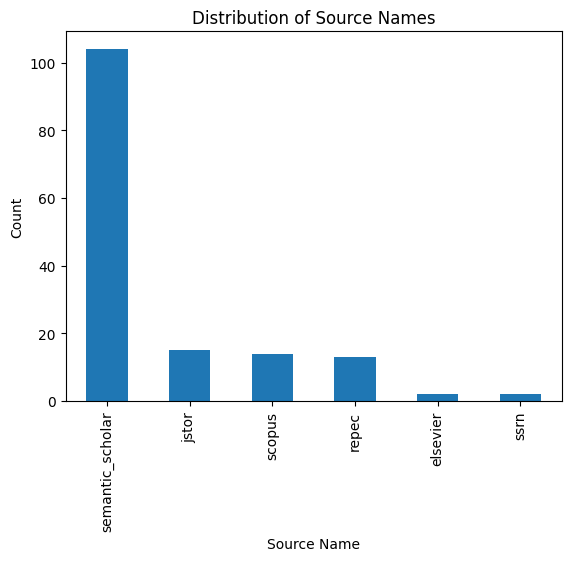

In [ ]:
# we need 2K pair. before pair should be sqrt(2000) = 45
# we need enough to make a pair that is with matching word length (30% of them are around similar length)
# (0.3*n)= 45
# n = 150
title_sample_size= 150 #

def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size, random_state=321)
  else:
    return df
df_min_max = sample_dataframe(df_min_max, title_sample_size)

import matplotlib.pyplot as plt

df_min_max['sourcename'].value_counts().plot(kind='bar')
plt.xlabel('Source Name')
plt.ylabel('Count')
plt.title('Distribution of Source Names')
plt.show()

Outcome pair is reperesenting true distribution in the 11M titles. It is not balanced pair from each sources.

In [ ]:
 #prep to make a pair

from string import printable
from collections import Counter

printable_dict = {c:i for i,c in enumerate(printable)}

def vectorize(title):
    cnt = Counter(title)
    array = [0 for _ in printable]+[0]
    for c,n in cnt.items():
        if c in printable_dict:
            array[printable_dict[c]]=n
        else:
            array[-1]+=n
    return np.array(array)

vects = []
for title in df_min_max.title:
    vects.append(vectorize(title))

In [ ]:
threshold = 1000 # force very high to return all possible pair
min_length = 5 # was 10 but change to 5 to keep all sampled titles


with open('/content/drive/MyDrive/finalMetaFile/counterVect_L1_2kPair_annotation_pooledFrom11MNotbalancedSources.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Title 1", "Title 2", "Similarity Score"])
# Iterate over title pairs
  for i, v1 in enumerate(vects):
    if sum(v1[:-1]) > min_length: # Only above a minimum number of printable characters
        for j, v2 in enumerate(vects):
            if sum(v2[:-1]) > min_length:
                if i!=j:
                    l1 = np.linalg.norm((v1[:-1] - v2[:-1]), ord=1)
                    if l1 < threshold:
                        t1 = df_min_max.iloc[i].title
                        t2 = df_min_max.iloc[j].title
                        writer.writerow([t1, t2, l1])
                        #print(f"{t1} _&_ {t2} (L1: {l1:.0f})")

In [ ]:
df_annotation_simialrLength = pd.read_csv(os.path.join(directory, 'counterVect_L1_1MPair_annotation_similarLengthTitleUpto3Words.csv'))
df_annotation_simialrLength['annotation_label']=0
df_annotation_simialrLength.head()

,Title 1,Title 2,Similarity Score,annotation_label
0,determinants of school enrolment in indonesia:...,transportation infrastructure and productivity...,56.0,0
1,determinants of school enrolment in indonesia:...,sexual risk behavior among hiv-infected women ...,38.0,0
2,determinants of school enrolment in indonesia:...,measuring the net benefits of payments for hyd...,30.0,0
3,determinants of school enrolment in indonesia:...,are smart cities more ecologically efficient? ...,32.0,0
4,determinants of school enrolment in indonesia:...,policy cognition is more effective than step t...,51.0,0


In [ ]:
df_annotation_simialrLength['annotation_label'] = df_annotation_simialrLength.apply(lambda row: 1 if row['Title 1'] == row['Title 2'] else 0, axis=1)
df_annotation_simialrLength['annotation_label'].sum()/len(df_annotation_simialrLength)

2.002002002002002e-06

In [ ]:
def count_words(title):
  words = title.split()
  return len(words)

df_annotation_simialrLength['word_count_Title1'] = df_annotation_simialrLength['Title 1'].apply(count_words)
df_annotation_simialrLength['word_count_Title2'] = df_annotation_simialrLength['Title 2'].apply(count_words)


In [ ]:
df_annotation_simialrLength_matched = df_annotation_simialrLength.drop(df_annotation_simialrLength.loc[(abs(df_annotation_simialrLength['word_count_Title1'] - df_annotation_simialrLength['word_count_Title2']) >= 3)].index)


In [ ]:
len(df_annotation_simialrLength_matched)/len(df_annotation_simialrLength)

0.3638298298298298

In [ ]:
df_annotation_simialrLength_matched[df_annotation_simialrLength_matched['annotation_label']==1]

,Title 1,Title 2,Similarity Score,annotation_label,word_count_Title1,word_count_Title2
71190,direct democracy and resource allocation: expe...,direct democracy and resource allocation: expe...,0.0,1,9,9
261809,direct democracy and resource allocation: expe...,direct democracy and resource allocation: expe...,0.0,1,9,9


In [ ]:
df_annotation_simialrLength_matched.to_csv(os.path.join(directory, 'counterVect_L1_2kPair_annotation_similarLengthTitleUpto3Words_pooledFrom11MNotbalancedSources.csv'), index=False)

In [ ]:
df_min_max_with_source_name = df_min_max.copy()
df_min_max_with_source_name = df_min_max_with_source_name.rename(columns={'sourcename': 'sourcename_title1'})
df_min_max_with_source_name = df_min_max_with_source_name.rename(columns={'title': 'Title 1'})
df_min_max_with_source_name.drop(columns=['word_count'], inplace=True)


df_min_max_with_source_name.head()

,sourcename_title1,Title 1
7258987,semantic_scholar,Barriers to Adoption of B2B E-marketplaces: An...
375921,jstor,Condiciones del trabajo estudiantil urbano y a...
6271934,semantic_scholar,Public Participation and Institutional Fit: A ...
3689233,semantic_scholar,The Policy Implications of Economic Complexity
3451176,semantic_scholar,Unpacking Widow Headship and Agency in Post-Co...


In [ ]:
df_annotation_simialrLength_matched_with_source_name = df_annotation_simialrLength_matched.copy()
df_annotation_simialrLength_matched_with_source_name = df_annotation_simialrLength_matched_with_source_name.rename(columns={'title': 'Title 1'})

df_annotation_simialrLength_matched_with_source_name.head()

,Title 1,Title 2,Similarity Score,annotation_label,word_count_Title1,word_count_Title2
1,determinants of school enrolment in indonesia:...,sexual risk behavior among hiv-infected women ...,38.0,0,11,12
2,determinants of school enrolment in indonesia:...,measuring the net benefits of payments for hyd...,30.0,0,11,12
3,determinants of school enrolment in indonesia:...,are smart cities more ecologically efficient? ...,32.0,0,11,9
6,determinants of school enrolment in indonesia:...,adaptation to climate change in afghanistan: e...,42.0,0,11,13
11,determinants of school enrolment in indonesia:...,non-monetary incentives for tobacco prevention...,32.0,0,11,9


In [ ]:
df_joined = df_annotation_simialrLength_matched_with_source_name.merge(df_min_max_with_source_name, left_on='Title 1', right_on='Title 1', how='left')
df_joined.head()

,Title 1,Title 2,Similarity Score,annotation_label,word_count_Title1,word_count_Title2,sourcename_title1
0,determinants of school enrolment in indonesia:...,sexual risk behavior among hiv-infected women ...,38.0,0,11,12,NaN
1,determinants of school enrolment in indonesia:...,measuring the net benefits of payments for hyd...,30.0,0,11,12,NaN
2,determinants of school enrolment in indonesia:...,are smart cities more ecologically efficient? ...,32.0,0,11,9,NaN
3,determinants of school enrolment in indonesia:...,adaptation to climate change in afghanistan: e...,42.0,0,11,13,NaN
4,determinants of school enrolment in indonesia:...,non-monetary incentives for tobacco prevention...,32.0,0,11,9,NaN


In [ ]:
# prompt: merge title from df_min_max to df_annotation_simialrLength_matched_with_source_name'title and just keep sourcename and call it sourcename_title1

df_annotation_simialrLength_matched_with_source_name = df_annotation_simialrLength_matched_with_source_name.merge(df_min_max_with_source_name, left_on='title1', right_on='title', how='left')
df_annotation_simialrLength_matched_with_source_name = df_annotation_simialrLength_matched_with_source_name.merge(df_min_max_with_source_name, left_on='title2', right_on='title', how='left')
df_annotation_simialrLength_matched_with_source_name = df_annotation_simialrLength_matched_with_source_name.rename(columns={'sourcename_title1_x': 'sourcename_title1', 'sourcename_title1_y': 'sourcename_title2'})
df_annotation_simialrLength_matched_with_source_name.drop(['title_x', 'title_y'], axis=1, inplace=True)
df_annotation_simialrLength_matched_with_source_name.head()


KeyError: 'title1'

In [ ]:

# Filter the DataFrame by sourcename.
df_3ie = df[df['sourcename'] == '3ie']
df_econlit = df[df['sourcename'] == 'econlit']
df_ssrn = df[df['sourcename'] == 'ssrn']
df_elsevier = df[df['sourcename'] == 'elsevier']
df_repec = df[df['sourcename'] == 'repec']
df_scopus = df[df['sourcename'] == 'scopus']
df_jstor = df[df['sourcename'] == 'jstor']
df_semantic_scholar = df[df['sourcename'] == 'semantic_scholar']
df_repec = df_repec[df_repec['word_count'] < 1000]

In [ ]:
min=5
max=20

df_3ie_min_max = df_3ie[(df_3ie['word_count'] >= min) & (df_3ie['word_count'] <= max)]
df_econlit_min_max = df_econlit[(df_econlit['word_count'] >= min) & (df_econlit['word_count'] <= max)]
df_ssrn_min_max = df_ssrn[(df_ssrn['word_count'] >= min) & (df_ssrn['word_count'] <= max)]
df_elsevier_min_max = df_elsevier[(df_elsevier['word_count'] >= min) & (df_elsevier['word_count'] <= max)]
df_repec_min_max = df_repec[(df_repec['word_count'] >= min) & (df_repec['word_count'] <= max)]
df_scopus_min_max = df_scopus[(df_scopus['word_count'] >= min) & (df_scopus['word_count'] <= max)]
df_jstor_min_max = df_jstor[(df_jstor['word_count'] >= min) & (df_jstor['word_count'] <= max)]
df_semantic_scholar_min_max = df_semantic_scholar[(df_semantic_scholar['word_count'] >= min) & (df_semantic_scholar['word_count'] <= max)]

def sample_dataframe(df, sample_size):
  if len(df) > sample_size:
    return df.sample(n=sample_size)
  else:
    return df

import math

# update this part to get enough of match for word length. Previous trial was 2k pair and 30% of them had a matching title length +/- 3 words. We need triple of them.
title_sample_size=round(math.sqrt(6000)/8)

df_3ie_min_max = sample_dataframe(df_3ie_min_max, title_sample_size)
df_econlit_min_max = sample_dataframe(df_econlit_min_max, title_sample_size)
df_ssrn_min_max = sample_dataframe(df_ssrn_min_max, title_sample_size)
df_elsevier_min_max = sample_dataframe(df_elsevier_min_max, title_sample_size)
df_repec_min_max = sample_dataframe(df_repec_min_max, title_sample_size)
df_scopus_min_max = sample_dataframe(df_scopus_min_max, title_sample_size)
df_jstor_min_max = sample_dataframe(df_jstor_min_max, title_sample_size)
df_semantic_scholar_min_max = sample_dataframe(df_semantic_scholar_min_max, title_sample_size)

df_make_pair = pd.concat([df_3ie_min_max, df_econlit_min_max, df_ssrn_min_max, df_elsevier_min_max, df_repec_min_max, df_scopus_min_max, df_jstor_min_max, df_semantic_scholar_min_max])

#df_make_pair.to_csv(os.path.join(directory, 'combined_metadata_final12_features_MakePair_annotation.csv'), index=False)

In [ ]:
len(df_make_pair)

80

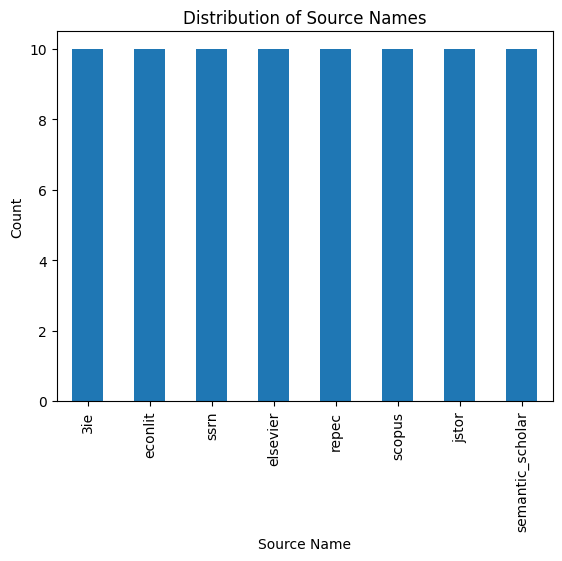

In [ ]:
import matplotlib.pyplot as plt

df_make_pair['sourcename'].value_counts().plot(kind='bar')
plt.xlabel('Source Name')
plt.ylabel('Count')
plt.title('Distribution of Source Names')
plt.show()

In [ ]:
# prep to make a pair

from string import printable
from collections import Counter

printable_dict = {c:i for i,c in enumerate(printable)}

def vectorize(title):
    cnt = Counter(title)
    array = [0 for _ in printable]+[0]
    for c,n in cnt.items():
        if c in printable_dict:
            array[printable_dict[c]]=n
        else:
            array[-1]+=n
    return np.array(array)

vects = []
for title in df_make_pair.title:
    vects.append(vectorize(title))

In [ ]:
threshold = 1000 # force very high to return all possible pair
min_length = 5 # was 10 but change to 5 to keep all sampled titles


with open('/content/drive/MyDrive/finalMetaFile/counterVect_L1_2kPair_annotation.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Title 1", "Title 2", "Similarity Score"])
# Iterate over title pairs
  for i, v1 in enumerate(vects):
    if sum(v1[:-1]) > min_length: # Only above a minimum number of printable characters
        for j, v2 in enumerate(vects):
            if sum(v2[:-1]) > min_length:
                if i!=j:
                    l1 = np.linalg.norm((v1[:-1] - v2[:-1]), ord=1)
                    if l1 < threshold:
                        t1 = df_make_pair.iloc[i].title
                        t2 = df_make_pair.iloc[j].title
                        writer.writerow([t1, t2, l1])
                        print(f"{t1} _&_ {t2} (L1: {l1:.0f})")

neither a zinc supplement nor phytate-reduced maize nor their combination enhance growth of 6- to 12-month-old guatemalan infants _&_ the effects of social norms on motivation crowding: experimental evidence from the tibetan plateau (L1: 45)
neither a zinc supplement nor phytate-reduced maize nor their combination enhance growth of 6- to 12-month-old guatemalan infants _&_ evaluating the environmental impact of payments for ecosystem services in coatepec (mexico) using remote sensing and on-site interviews (L1: 54)
neither a zinc supplement nor phytate-reduced maize nor their combination enhance growth of 6- to 12-month-old guatemalan infants _&_ saving lives with pre-arranged disaster aid: evidence from mexico (L1: 80)
neither a zinc supplement nor phytate-reduced maize nor their combination enhance growth of 6- to 12-month-old guatemalan infants _&_ conditional cash transfers and child labor (L1: 89)
neither a zinc supplement nor phytate-reduced maize nor their combination enhance gr

In [ ]:
df_annotation = pd.read_csv(os.path.join(directory, 'counterVect_L1_2kPair_annotation.csv'))
df_annotation['annotation_label']=0
df_annotation.head()

,Title 1,Title 2,Similarity Score,annotation_label
0,neither a zinc supplement nor phytate-reduced ...,the effects of social norms on motivation crow...,45.0,0
1,neither a zinc supplement nor phytate-reduced ...,evaluating the environmental impact of payment...,54.0,0
2,neither a zinc supplement nor phytate-reduced ...,saving lives with pre-arranged disaster aid: e...,80.0,0
3,neither a zinc supplement nor phytate-reduced ...,conditional cash transfers and child labor,89.0,0
4,neither a zinc supplement nor phytate-reduced ...,do households gain from community-based natura...,51.0,0


In [ ]:
df_annotation['annotation_label'] = df_annotation.apply(lambda row: 1 if row['Title 1'] == row['Title 2'] else 0, axis=1)

In [ ]:
df_annotation['annotation_label'].sum()/len(df_annotation)

0.0

In [ ]:
df_annotation[df_annotation['annotation_label']==1]


,Title 1,Title 2,Similarity Score,annotation_label


# match based on length of title

In [ ]:
threshold = 1000 # force very high to return all possible pair
min_length = 5 # was 10 but change to 5 to keep all sampled titles

with open('/content/drive/MyDrive/finalMetaFile/counterVect_L1_2kPair_annotation_similarLengthTitleUpto3Words.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Title 1", "Title 2", "Similarity Score"])
# Iterate over title pairs
  for i, v1 in enumerate(vects):
    if sum(v1[:-1]) > min_length: # Only above a minimum number of printable characters
        for j, v2 in enumerate(vects):
            if sum(v2[:-1]) > min_length:
                if i!=j:
                    if abs(len(v1[:-1]) - len(v2[:-1])) <= 3:
                        l1 = np.linalg.norm((v1[:-1] - v2[:-1]), ord=1)
                        if l1 < threshold:
                            t1 = df_make_pair.iloc[i].title
                            t2 = df_make_pair.iloc[j].title
                            writer.writerow([t1, t2, l1])
                            #print(f"{t1} _&_ {t2} (L1: {l1:.0f})")


In [ ]:
df_annotation_simialrLength = pd.read_csv(os.path.join(directory, 'counterVect_L1_2kPair_annotation_similarLengthTitleUpto3Words.csv'))
df_annotation_simialrLength['annotation_label']=0
df_annotation_simialrLength.head()

,Title 1,Title 2,Similarity Score,annotation_label
0,motivational interviewing retention counseling...,does performance related pay for teachers impr...,82.0,0
1,motivational interviewing retention counseling...,the effect of essential medicines programme on...,82.0,0
2,motivational interviewing retention counseling...,spousal control and intra-household decision m...,76.0,0
3,motivational interviewing retention counseling...,the impact of high-speed rail on housing price...,77.0,0
4,motivational interviewing retention counseling...,impact of family planning health education on ...,73.0,0


In [ ]:
len(df_annotation_simialrLength)

6320

In [ ]:
df_annotation_simialrLength.head()

,Title 1,Title 2,Similarity Score,annotation_label
0,motivational interviewing retention counseling...,does performance related pay for teachers impr...,82.0,0
1,motivational interviewing retention counseling...,the effect of essential medicines programme on...,82.0,0
2,motivational interviewing retention counseling...,spousal control and intra-household decision m...,76.0,0
3,motivational interviewing retention counseling...,the impact of high-speed rail on housing price...,77.0,0
4,motivational interviewing retention counseling...,impact of family planning health education on ...,73.0,0


In [ ]:
def count_words(title):
  words = title.split()
  return len(words)

df_annotation_simialrLength['word_count_Title1'] = df_annotation_simialrLength['Title 1'].apply(count_words)
df_annotation_simialrLength['word_count_Title2'] = df_annotation_simialrLength['Title 2'].apply(count_words)


In [ ]:

df_annotation_simialrLength_matched = df_annotation_simialrLength.drop(df_annotation_simialrLength.loc[(abs(df_annotation_simialrLength['word_count_Title1'] - df_annotation_simialrLength['word_count_Title2']) >= 3)].index)


In [ ]:
len(df_annotation_simialrLength_matched)/len(df_annotation_simialrLength)

0.3477848101265823

In [ ]:
df_annotation_simialrLength_matched['annotation_label'] = df_annotation_simialrLength.apply(lambda row: 1 if row['Title 1'] == row['Title 2'] else 0, axis=1)
df_annotation_simialrLength_matched.to_csv(os.path.join(directory, 'counterVect_L1_2kPair_annotation_similarLengthTitleUpto3Words.csv'), index=False)
df_annotation_simialrLength_matched['annotation_label'].sum()/len(df_annotation_simialrLength_matched)

0.0

In [ ]:
len(df_annotation_simialrLength_matched)

2198

In [ ]:
df_annotation_simialrLength_matched[df_annotation_simialrLength_matched['annotation_label']==1]


,Title 1,Title 2,Similarity Score,annotation_label,word_count_Title1,word_count_Title2


In [ ]:
len(df_annotation_simialrLength)

2256